In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Masayo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [3]:
pip install seaborn

     -------------------------------------- 293.3/293.3 KB 4.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Masayo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
titanic = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv')

In [6]:
!pip install --upgrade pip

     ---------------------------------------- 2.1/2.1 MB 5.1 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\Masayo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [7]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [10]:
titanic_clean =  titanic[['survived','pclass','sex','age','sibsp','parch','fare','embarked','deck']]

In [11]:
titanic_clean.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


In [12]:
titanic_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
 8   deck      203 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [13]:
# types of missing data
# MCAR - data missing completely at random
# MAR - data missing at random - there is a reason why the data point is missing
# MNAR - data missing not at random - data is missing for a particular reason

In [14]:
titanic_clean['age'].mean()

29.69911764705882

In [15]:
titanic_clean['age'].fillna(titanic_clean['age'].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

In [16]:
# the first part of the function isolates the column we are filling in the missing data for - in our case: titanic_clean['age']
# the second part of the function, fillna() isolates just the missing values
# the first part of the function inside fillna() groups the data by pclass and isolates the ages
# the transform function replaces missing values NaN with the 'mean' of the grouped ages

titanic_clean['age'].fillna(titanic_clean.groupby('pclass')['age'].transform('mean'))

0      22.00000
1      38.00000
2      26.00000
3      35.00000
4      35.00000
         ...   
886    27.00000
887    19.00000
888    25.14062
889    26.00000
890    32.00000
Name: age, Length: 891, dtype: float64

In [17]:
# to make the change permanent, we need to set the age column equal to this transformation

titanic_clean['age'] = titanic_clean['age'].fillna(titanic_clean.groupby('pclass')['age'].transform('mean'))

C:\Users\Masayo\AppData\Local\Temp\ipykernel_20136\3730292689.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_clean['age'] = titanic_clean['age'].fillna(titanic_clean.groupby('pclass')['age'].transform('mean'))


In [18]:
titanic_clean.drop('deck', axis=1, inplace=True)

C:\Users\Masayo\AppData\Local\Temp\ipykernel_20136\2286092298.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_clean.drop('deck', axis=1, inplace=True)


In [19]:
titanic_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       891 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [20]:
# check the survived column
titanic_clean.groupby('survived').count()

,pclass,sex,age,sibsp,parch,fare,embarked
survived,,,,,,,
0,549,549,549,549,549,549,549
1,342,342,342,342,342,342,340


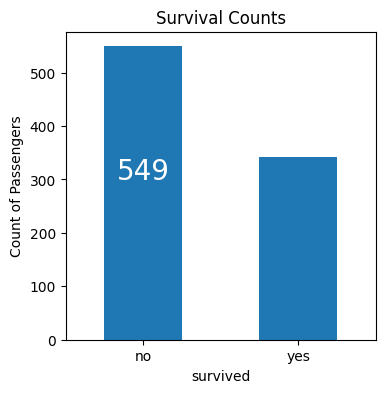

In [40]:
fig, (ax) = plt.subplots(1,1, figsize=(4,4))

titanic_clean.groupby('survived')['pclass'].count().\
    plot(ax=ax,kind='bar',figsize=(4,4), title='Survival Counts', ylabel='Count of Passengers')

ax.annotate(titanic_clean.groupby('survived')['pclass'].count().loc[0],(0,300), ha='center', color='white', fontsize=20)
ax.set_xticks(labels=['no','yes'], ticks=[0,1], rotation=360)

<Axes: xlabel='survived'>

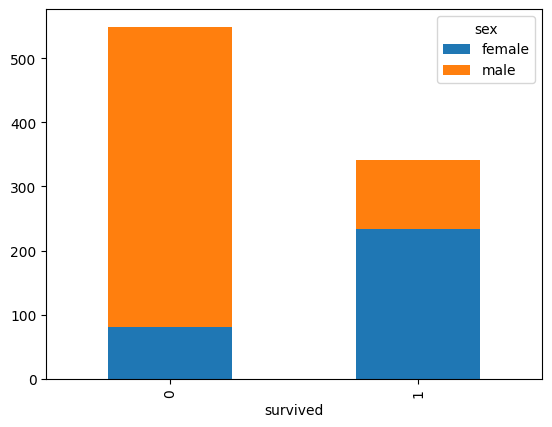

In [41]:
titanic_clean.groupby(['survived','sex'])['pclass'].count().unstack().plot(kind='bar', stacked=True)

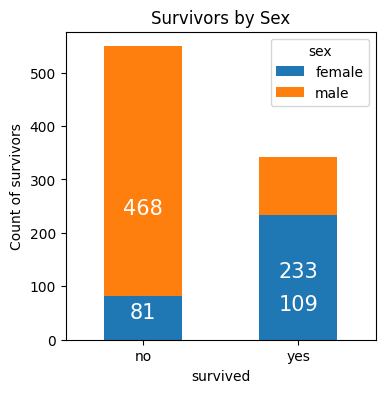

In [42]:
# create a plot with pandas plot
fig, (ax) = plt.subplots(1,1, figsize=(4,4))

# create a plot with pandas plot
titanic_clean.groupby(['survived','sex'])['pclass'].count().unstack().plot(kind='bar',
                                                                            stacked=True, ax=ax, title='Survivors by Sex',
                                                                            ylabel='Count of survivors')

for i in range(2):
    ax.annotate(titanic_clean.groupby(['survived','sex'])['pclass'].count().unstack().iloc[i,0],(i,(titanic_clean.groupby(['survived','sex'])['pclass'].count().unstack().iloc[i,0]/2)), ha='center', color='white', fontsize=15)
    ax.annotate(titanic_clean.groupby(['survived','sex'])['pclass'].count().unstack().iloc[i,1],(i,(titanic_clean.groupby(['survived','sex'])['pclass'].count().unstack().iloc[i,1]/2)), ha='center', color='white', fontsize=15)

ax.set_xticks(labels=['no','yes'], ticks=[0,1], rotation=360)

<Axes: xlabel='survived,pclass'>

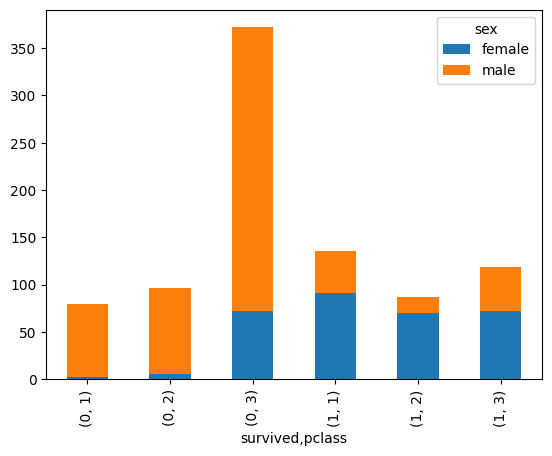

In [43]:
titanic_clean.groupby(['survived','pclass','sex'])['age'].count().unstack().plot(kind='bar',stacked=True)

In [44]:
titanic_clean['family_size'] = titanic_clean['sibsp'] +  titanic_clean['parch'] +1

C:\Users\Masayo\AppData\Local\Temp\ipykernel_20136\2630013019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_clean['family_size'] = titanic_clean['sibsp'] +  titanic_clean['parch'] +1


In [46]:
titanic_clean

,survived,pclass,sex,age,sibsp,parch,fare,embarked,family_size
0,0,3,male,22.00000,1,0,7.2500,S,2
1,1,1,female,38.00000,1,0,71.2833,C,2
2,1,3,female,26.00000,0,0,7.9250,S,1
3,1,1,female,35.00000,1,0,53.1000,S,2
4,0,3,male,35.00000,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.00000,0,0,13.0000,S,1
887,1,1,female,19.00000,0,0,30.0000,S,1
888,0,3,female,25.14062,1,2,23.4500,S,4
889,1,1,male,26.00000,0,0,30.0000,C,1


<Axes: xlabel='family_size', ylabel='Count'>

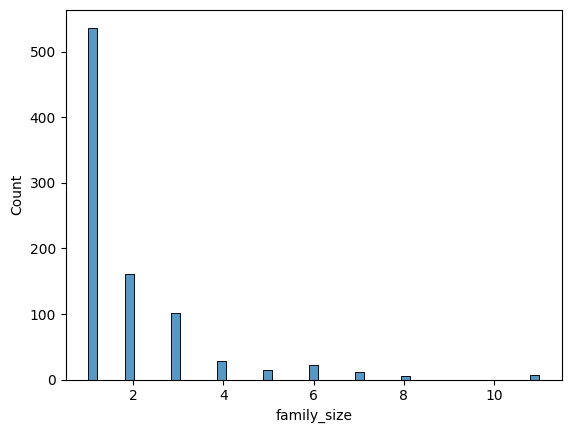

In [47]:
sns.histplot(titanic_clean['family_size'])

<Axes: xlabel='age', ylabel='family_size'>

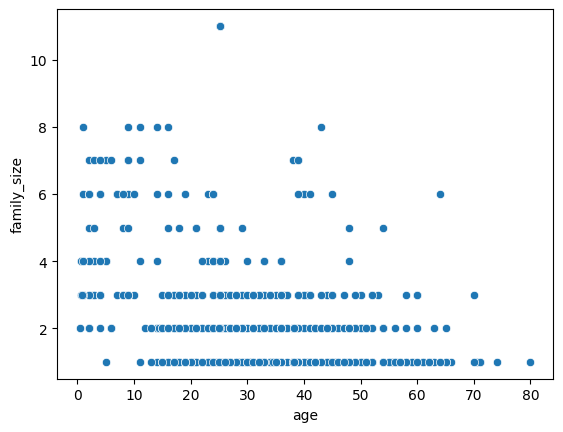

In [49]:
sns.scatterplot(x='age',y='family_size',data=titanic_clean)

<Axes: ylabel='fare'>

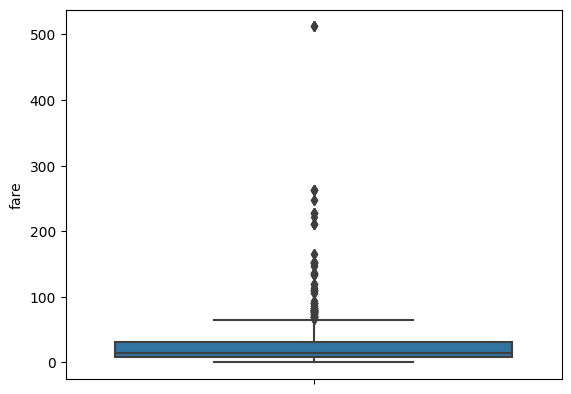

In [50]:
sns.boxplot(y='fare', data=titanic_clean)

In [51]:
titanic_clean.set_index('fare').sort_index().loc[:150].reset_index()

,fare,survived,pclass,sex,age,sibsp,parch,embarked,family_size
0,0.0000,1,3,male,25.000000,0,0,S,1
1,0.0000,0,3,male,49.000000,0,0,S,1
2,0.0000,0,3,male,19.000000,0,0,S,1
3,0.0000,0,1,male,38.233441,0,0,S,1
4,0.0000,0,2,male,29.877630,0,0,S,1
...,...,...,...,...,...,...,...,...,...
857,135.6333,1,1,female,35.000000,0,0,S,1
858,135.6333,1,1,female,36.000000,0,0,C,1
859,135.6333,0,1,male,22.000000,0,0,C,1
860,146.5208,1,1,female,58.000000,0,0,C,1


<Axes: xlabel='sex', ylabel='fare'>

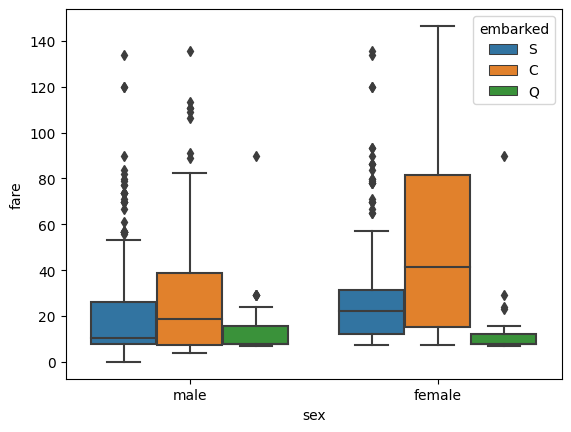

In [52]:
sns.boxplot(x='sex', y='fare', hue='embarked', data=titanic_clean.set_index('fare').sort_index().loc[:150].reset_index())

<Axes: xlabel='survived', ylabel='fare'>

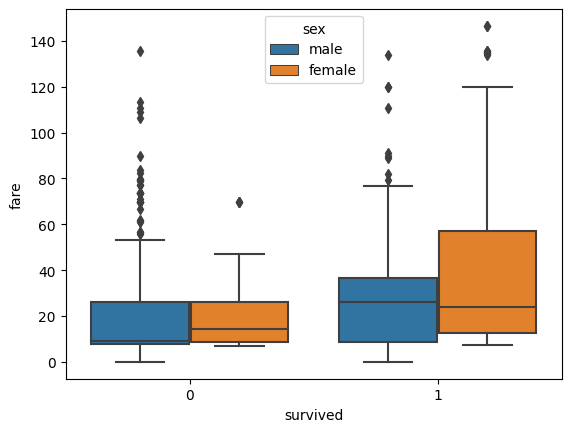

In [53]:
# we can set the hue paramater to add an additional segmentation; hue means 'color'
sns.boxplot(x='survived', y='fare', hue='sex', data=titanic_clean.set_index('fare').sort_index().loc[:150].reset_index())

C:\Users\Masayo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


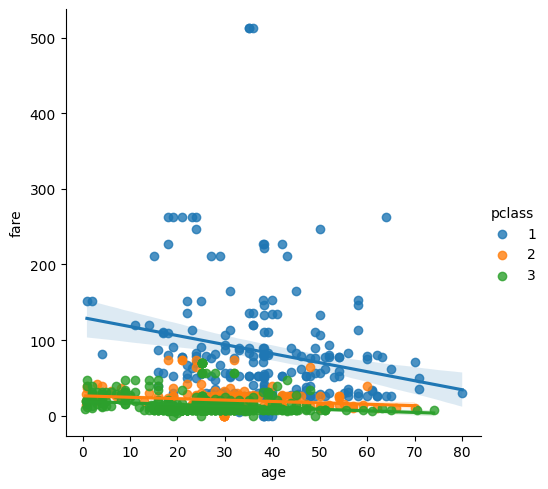

In [55]:
sns.lmplot(x='age', y='fare',hue='pclass', data=titanic_clean)